https://www.kaggle.com/datasets/iamtapendu/chest-x-ray-lungs-segmentation


```
Conjunto de datos de radiografías de tórax para segmentación de tuberculosis
```
# Acerca del conjunto de datos

*Descripción del conjunto de datos de radiografías de tórax (Montgomery y Shenzhen)
Este conjunto de datos consta de 704 imágenes de radiografías de tórax que se seleccionaron de dos fuentes: la base de datos de radiografías de tórax del condado de Montgomery (EE. UU.) y la base de datos de radiografías de tórax de Shenzhen (China). Las imágenes se utilizan para entrenar y evaluar modelos de aprendizaje automático para la detección de tuberculosis (TB) .

El conjunto de datos contiene radiografías de tórax tanto positivas como normales para tuberculosis, junto con detalles demográficos como género , edad y condado de origen. Las imágenes están acompañadas de máscaras de segmentación pulmonar y metadatos clínicos , lo que hace que el conjunto de datos sea muy adecuado para aplicaciones de aprendizaje profundo en imágenes médicas.

*


In [1]:
from google.colab import files
uploaded = files.upload()

Saving MetaData.csv to MetaData.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Leer el archivo CSV
#metadata = pd.read_csv(file_path)
metadata = pd.read_csv('MetaData.csv')
# Verificar las primeras filas
print(metadata.head())

     id gender age    county  ptb                                      remarks
0  1000   male  31  Shenxhen    0                                       normal
1  1001   male  64  Shenxhen    0                                       normal
2  1002   male  35  Shenxhen    0                                       normal
3  1003   male  32  Shenxhen    1               STB,ATB,tuberculosis pleuritis
4  1004   male   2  Shenxhen    1  secondary PTB  in the bilateral upper field


Paso 1: Limpieza inicial del dataset
Convertimos la columna age a valores numéricos y verificamos las inconsistencias.

In [4]:
# Verificar los valores únicos en la columna 'age' para identificar inconsistencias
age_values = metadata['age'].unique()
print("Valores únicos de la columna 'age':", age_values)

# Limpieza: Convertir 'age' a numérico, reemplazando valores no válidos por NaN
metadata['age'] = pd.to_numeric(metadata['age'], errors='coerce')
print("Datos después de convertir 'age' a numérico:\n", metadata['age'].head())


Valores únicos de la columna 'age': ['31' '64' '35' '32' '2' '17' '25' '30' '27' '37' '26' '46' '57' '23' '33'
 '45' '74' '48' '20' '56' '39' '43' '38' '65' '28' '47' '60' '29' '34' '5'
 '22' '24' '68' '42' '18' '1' '78' '53' '21' '59' '8' '63' '75' '19' '36'
 '51' '40' '69' '61' '41' '15' '49' '52' '62' '85' '50' '44' '71' '10'
 '58' '55' '1yr' '6' '76' '7' '54' '39yr' '16month' '3' '67' '81' 'male35'
 '70' 'female24' '14' '82' '89' '035' '032' '061' '046' '077' '049' '053'
 '043' '039' '030' '024' '037' '028' '009' '011' '063' '031' '067' '021'
 '052' '038' '044' '054' '088' '014' '047' '042' '020' '008' '033' '034'
 '051' '005' '015' '025' '016' '045' '048' '069' '065' '036' '050' '056'
 '089' '017' '041' '027' '023' '026' '029' '070' '018' '040' '010' '019'
 '004' '084' '085' '068' '059' '073']
Datos después de convertir 'age' a numérico:
 0    31.0
1    64.0
2    35.0
3    32.0
4     2.0
Name: age, dtype: float64


Paso 2: Distribución por género y edad
Creamos un histograma para visualizar la distribución de edades, segmentado por género.

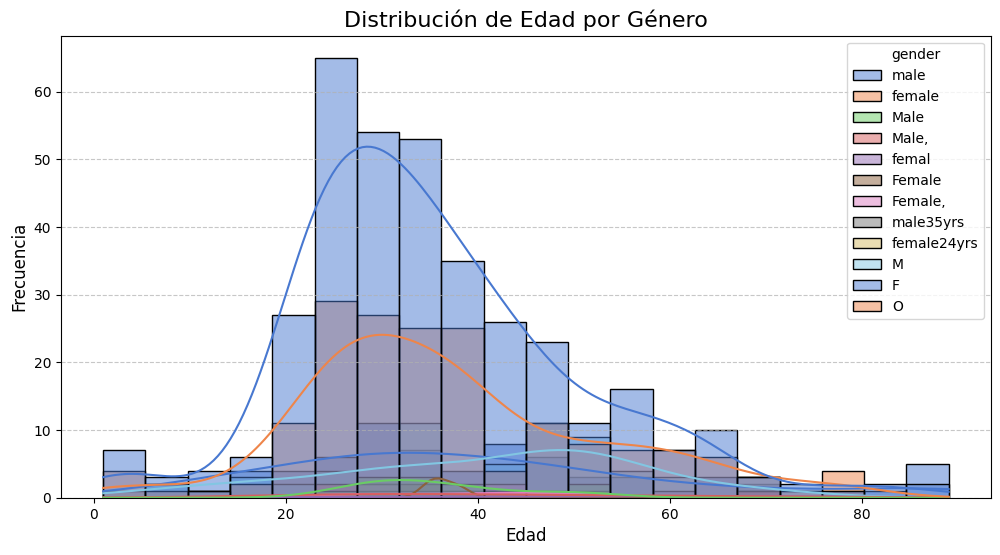

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crear un histograma con seaborn
# sns.histplot: Función de Seaborn para crear histogramas.
# data=metadata: Utiliza el dataset 'metadata' como fuente de datos.
# x='age': La variable 'age' será la que se represente en el eje X.
# hue='gender': Se segmentarán los datos por género, utilizando colores diferentes para cada grupo.
# kde=True: Incluye una curva de densidad (KDE) sobre el histograma, suavizando la distribución.
# bins=20: Divide la variable 'age' en 20 intervalos (bins) para el histograma.
# palette='muted': Define una paleta de colores suaves para diferenciar los géneros.
sns.histplot(data=metadata, x='age', kde=True, bins=20, palette='muted', hue='gender')

# Agregar un título al gráfico
plt.title('Distribución de Edad por Género', fontsize=16)

# Etiquetas de los ejes X y Y
plt.xlabel('Edad', fontsize=12)  # Etiqueta del eje X
plt.ylabel('Frecuencia', fontsize=12)  # Etiqueta del eje Y

# Agregar una cuadrícula vertical (en el eje Y) para facilitar la lectura de los valores
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()



Paso 3: Conteo de casos de tuberculosis (ptb)
Creamos un gráfico de barras que muestra la cantidad de casos normales y afectados.

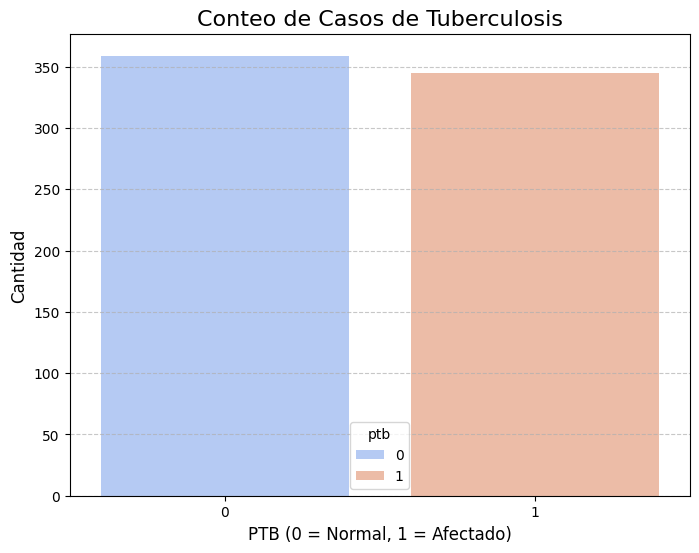

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la figura
plt.figure(figsize=(8, 6))

# Gráfico de conteo con colores asignados a los valores de 'ptb'
sns.countplot(data=metadata, x='ptb', hue='ptb', palette='coolwarm', dodge=False)

# Títulos y etiquetas
plt.title('Conteo de Casos de Tuberculosis', fontsize=16)
plt.xlabel('PTB (0 = Normal, 1 = Afectado)', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()



Paso 4: Gráficos por ubicación (county)
Mostramos los 10 condados con más registros.

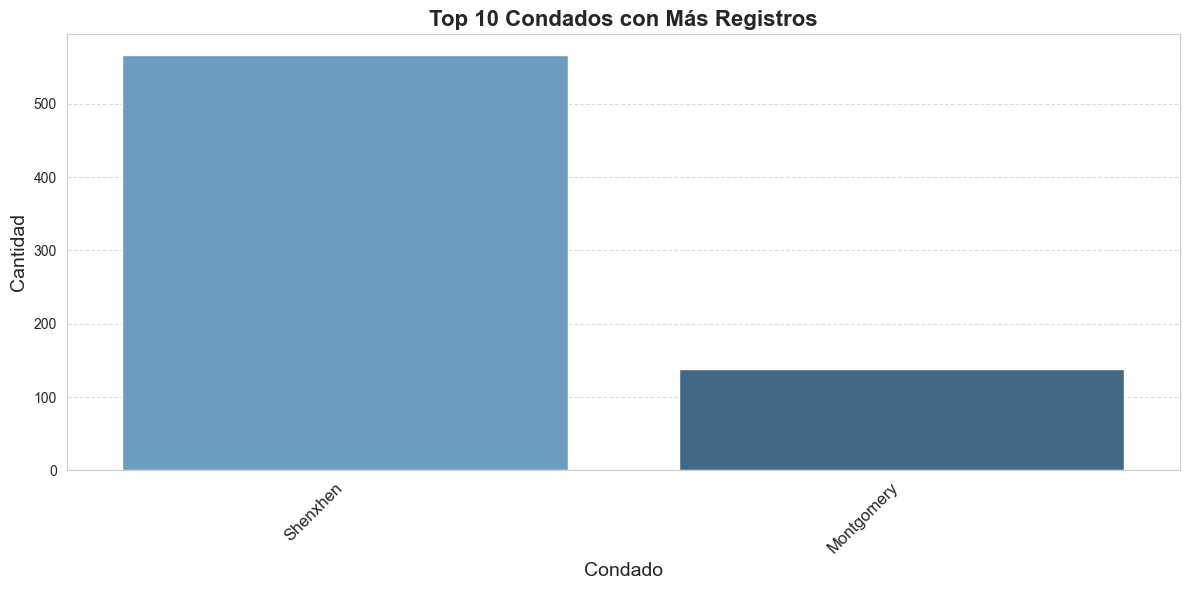

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar los 10 condados con más registros
top_counties = metadata['county'].value_counts().head(10)

# Configurar estilo de Seaborn para hacer el gráfico más atractivo
sns.set_style('whitegrid')  # Establece un estilo con fondo de cuadrícula

# Gráfico de barras de los condados
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Usar el parámetro hue asignando el eje x para evitar el warning
sns.barplot(x=top_counties.index, y=top_counties.values, palette='Blues_d', hue=top_counties.index)

# Personalización del gráfico
plt.title('Top 10 Condados con Más Registros', fontsize=16, fontweight='bold')  # Título con negrita
plt.xlabel('Condado', fontsize=14)  # Etiqueta del eje X con tamaño de fuente mayor
plt.ylabel('Cantidad', fontsize=14)  # Etiqueta del eje Y con tamaño de fuente mayor

# Rotación de las etiquetas del eje X para mejor visualización
plt.xticks(rotation=45, ha='right', fontsize=12)  # ha='right' alinea las etiquetas a la derecha

# Mostrar la cuadrícula solo en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el gráfico



Paso 5: Limpieza final del dataset

In [7]:
# Eliminar filas con valores nulos en la columna 'age'
metadata_cleaned = metadata.dropna(subset=['age'])

# Mostrar la información del dataset limpio
print("Información del dataset limpio:")
metadata_cleaned.info()


Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 0 to 703
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       697 non-null    int64  
 1   gender   697 non-null    object 
 2   age      697 non-null    float64
 3   county   697 non-null    object 
 4   ptb      697 non-null    int64  
 5   remarks  692 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 38.1+ KB
